In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches

import numpy as np
import json

%matplotlib notebook


In [2]:
def get_ticks(fig, ax):
    """
    Get tiks values of x and y axes and 
    positions of tiks in figure's coordinate system
    """
    
    ax_to_figure_transformation = ax.transAxes + ax.figure.transFigure.inverted()

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xticks_pos = [(tick - x_min)/(x_max - x_min) for tick in ax.get_xticks()]
    yticks_pos = [(tick - y_min)/(y_max - y_min) for tick in ax.get_yticks()]
    
    crd_x = np.vstack((xticks_pos, np.zeros_like(xticks_pos))).T
    crd_y = np.vstack((np.zeros_like(yticks_pos), yticks_pos)).T

    xticks_pos = ax_to_figure_transformation.transform(crd_x)
    yticks_pos = ax_to_figure_transformation.transform(crd_y)

    return ax.get_xticks(), ax.get_yticks(), xticks_pos, yticks_pos


def get_ticks_labels(fig, ax):
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
   
    labels = {'x': None, 'y': None}
    x_labels = []
    x_coords = []
    for lbl in ax.get_xticklabels():
        x = lbl._x
        y = lbl._y
        text = lbl._text
        xticks_pos = (x - x_min) / (x_max - x_min)
        yticks_pos = (y - y_min) / (y_max - y_min)

        crd = ax_to_figure_transformation.transform((xticks_pos, yticks_pos))
        x_coords.append(crd)
        x_labels.append({'coords': crd, 'text': text})


    y_labels = []
    y_coords = []
    for lbl in ax.get_yticklabels():
        x = lbl._x
        y = lbl._y
        text = lbl._text

        xticks_pos = (x - x_min) / (x_max - x_min)
        yticks_pos = (y - y_min) / (y_max - y_min)

        crd = ax_to_figure_transformation.transform((xticks_pos, yticks_pos))
#         crd = data_to_figure_transformation.transform((x, y))
        y_coords.append(crd)
        y_labels.append({'coords': crd, 'text': text})
        
    return x_labels, y_labels, np.array(x_coords), np.array(y_coords)


def get_ticks_labels(fig, ax):
    print(x_lbl.get_position())
    

def get_bbox_coordinates(fig, ax):   
    p0, p1 = ax.bbox._bbox._points
    x0, y0 = p0
    x1, y1 = p1
    return np.array([[x0, y0], [x0, y1], [x1, y0], [x1, y1]])


# print(get_ticks_labels(fig, ax))
# get_ticks_labels(fig, ax)

# Line plots


Create a simple plot

<IPython.core.display.Javascript object>


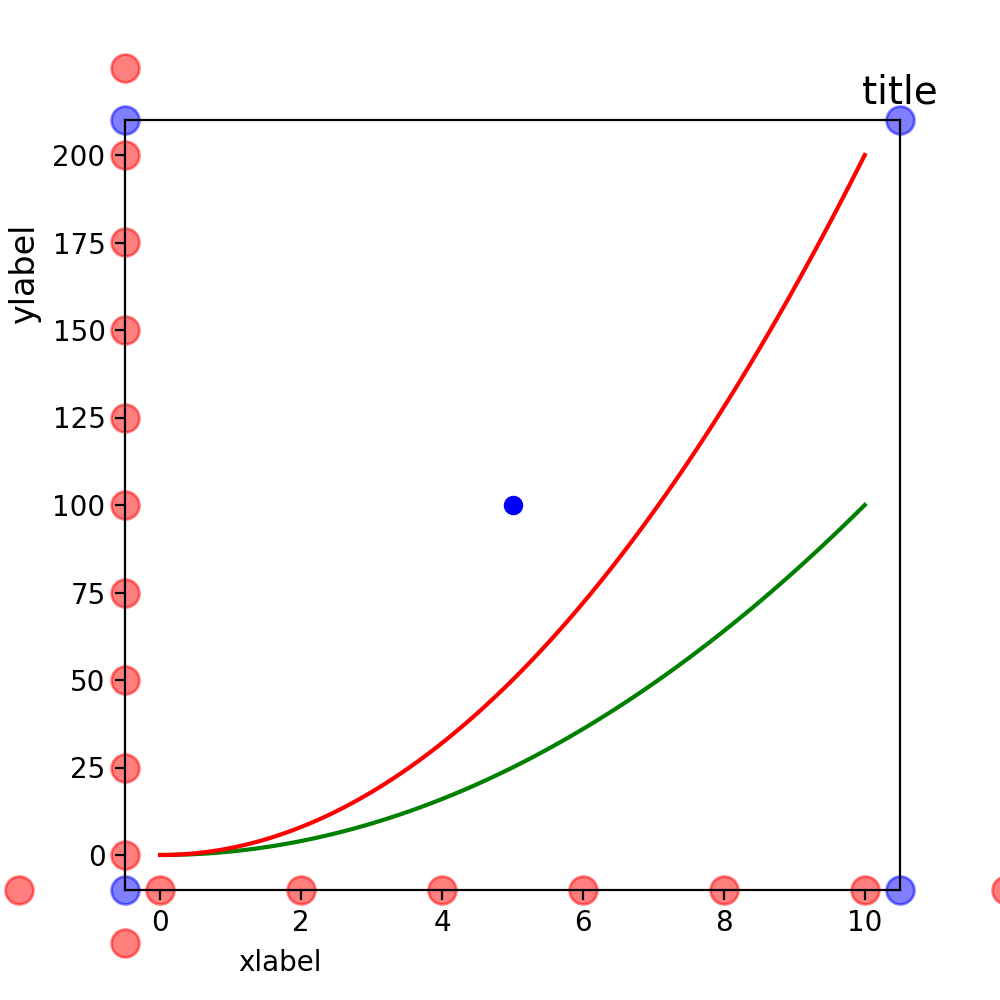

(0.5, 1.0)
(1, 0.5)
(0.5, 0)
(0.2, 1)
(0, 0.5)
(1, 0.8)


In [5]:
fig, ax = plt.subplots(figsize=(5,5))

x_lbl = ax.set_xlabel('xlabel', fontsize=10)
y_lbl = ax.set_ylabel('ylabel', fontsize=12)
ttl = ax.set_title('title', fontsize=14)

#
# Plotting in a normal way
#
x = np.linspace(0, 10, 100)
ax.plot(x, x**2, 'g')
ax.plot(x, 2 * x**2, 'r')

point = [5, 100]
ax.scatter(*point, color='b')

#
# Plotting using figure's coordinate system
#
#coords = data_to_figure_transformation(point)
#ax.scatter(*coords, color='r', s=200, alpha=0.5, 
#           transform=fig.transFigure)


#
# Ticks positions in figure's coodinate system
#
_, _, xticks_pos, yticks_pos = get_ticks(fig, ax)
for p in yticks_pos:    
    ax.scatter(*p, color='r', s=100, alpha=0.5, 
               transform=fig.transFigure, clip_on=False)
    
for p in xticks_pos:    
    ax.scatter(
        *p, color='r', s=100, alpha=0.5, 
        transform=fig.transFigure, clip_on=False)

#
# Bbox position in figure's coodinate system
#
bbox_points = get_bbox_coordinates(fig, ax)
for point in bbox_points:
    ax.scatter(*point, color='b', s=100, alpha=0.5, 
        transform=fig.transFigure, clip_on=False)
    
#
# Labels positions in figure's coodinate system
#

# Note: Coudn't get figure's coordinates yet
#       but now I can get position of the center
#       of the title/label on the axes

print(ttl.get_position())
ttl.set_position((1, 0.5))
print(ttl.get_position())

print(x_lbl.get_position())
x_lbl.set_position((0.2, 1))
print(x_lbl.get_position())

print(y_lbl.get_position())
y_lbl.set_position((1, 0.8))
print(y_lbl.get_position())
fig.savefig('figures/test_figure_sc/test1.png')


In [4]:
js_description = {}

#
# Labels data
#
js_description['y_label_position'] = y_lbl.get_position()
js_description['x_label_position'] = x_lbl.get_position()
js_description['title_position'] = ttl.get_position()


#
# Axes and ticks data
#

x_ticks, y_ticks, x_ticks_pos, y_ticks_pos = get_ticks(fig, ax)

js_description['bbox_coordinates'] = get_bbox_coordinates(fig, ax)
js_description['x_lims'] = ax.get_xlim()
js_description['y_lims'] = ax.get_ylim()
js_description['x_ticks_num'] = len(x_ticks)
js_description['y_ticks_num'] = len(x_ticks)
# js_description['x_ticks'] = x_ticks
# js_description['y_ticks'] = y_ticks
js_description['x_ticks_positions'] = x_ticks_pos
js_description['y_ticks_positions'] = y_ticks_pos

js_description['x_label'] = x_lbl.get_position()[0]
js_description['y_label'] = y_lbl.get_position()[1]
js_description['title'] = y_lbl.get_position()


#
# Lines data
#

js_description['lines_num'] = len(ax.lines)


js_description


{'y_label_position': (41.31944444444444, 0.8),
 'x_label_position': (0.2, 51.44444444444443),
 'title_position': (1, 1.0),
 'bbox_coordinates': array([[0.125, 0.11 ],
        [0.125, 0.88 ],
        [0.9  , 0.11 ],
        [0.9  , 0.88 ]]),
 'x_lims': (-0.5, 10.5),
 'y_lims': (-10.0, 210.0),
 'x_ticks_num': 8,
 'y_ticks_num': 8,
 'x_ticks_positions': array([[0.01931818, 0.11      ],
        [0.16022727, 0.11      ],
        [0.30113636, 0.11      ],
        [0.44204545, 0.11      ],
        [0.58295455, 0.11      ],
        [0.72386364, 0.11      ],
        [0.86477273, 0.11      ],
        [1.00568182, 0.11      ]]),
 'y_ticks_positions': array([[0.125 , 0.0575],
        [0.125 , 0.145 ],
        [0.125 , 0.2325],
        [0.125 , 0.32  ],
        [0.125 , 0.4075],
        [0.125 , 0.495 ],
        [0.125 , 0.5825],
        [0.125 , 0.67  ],
        [0.125 , 0.7575],
        [0.125 , 0.845 ],
        [0.125 , 0.9325]]),
 'x_label': 0.2,
 'y_label': 0.8,
 'title': (41.31944444444444, 0

In [10]:
ax.lines[0].__dict__

{'_stale': False,
 'stale_callback': <function matplotlib.artist._stale_axes_callback(self, val)>,
 '_axes': <AxesSubplot:title={'center':'title'}, xlabel='xlabel', ylabel='ylabel'>,
 'figure': <Figure size 1000x1000 with 1 Axes>,
 '_transform': <matplotlib.transforms.CompositeGenericTransform at 0x7fbea215a3a0>,
 '_transformSet': True,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': <matplotlib.transforms.TransformedBbox at 0x7fbe801587c0>,
 '_clippath': None,
 '_clipon': True,
 '_label': '_line0',
 '_picker': None,
 '_contains': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x7fbe80158670>,
 '_remove_method': <function list.remove(value, /)>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_dashcapstyle': <CapStyle.butt: 'butt'>,
 '_dashjoinstyle': <JoinStyle.round: 'round'>,
 '_solidjo

# Representability of coordinates

#### As you can see from the picture below, with such import of pictures, the coordinates really go to the coordinates of the figure.

<IPython.core.display.Javascript object>


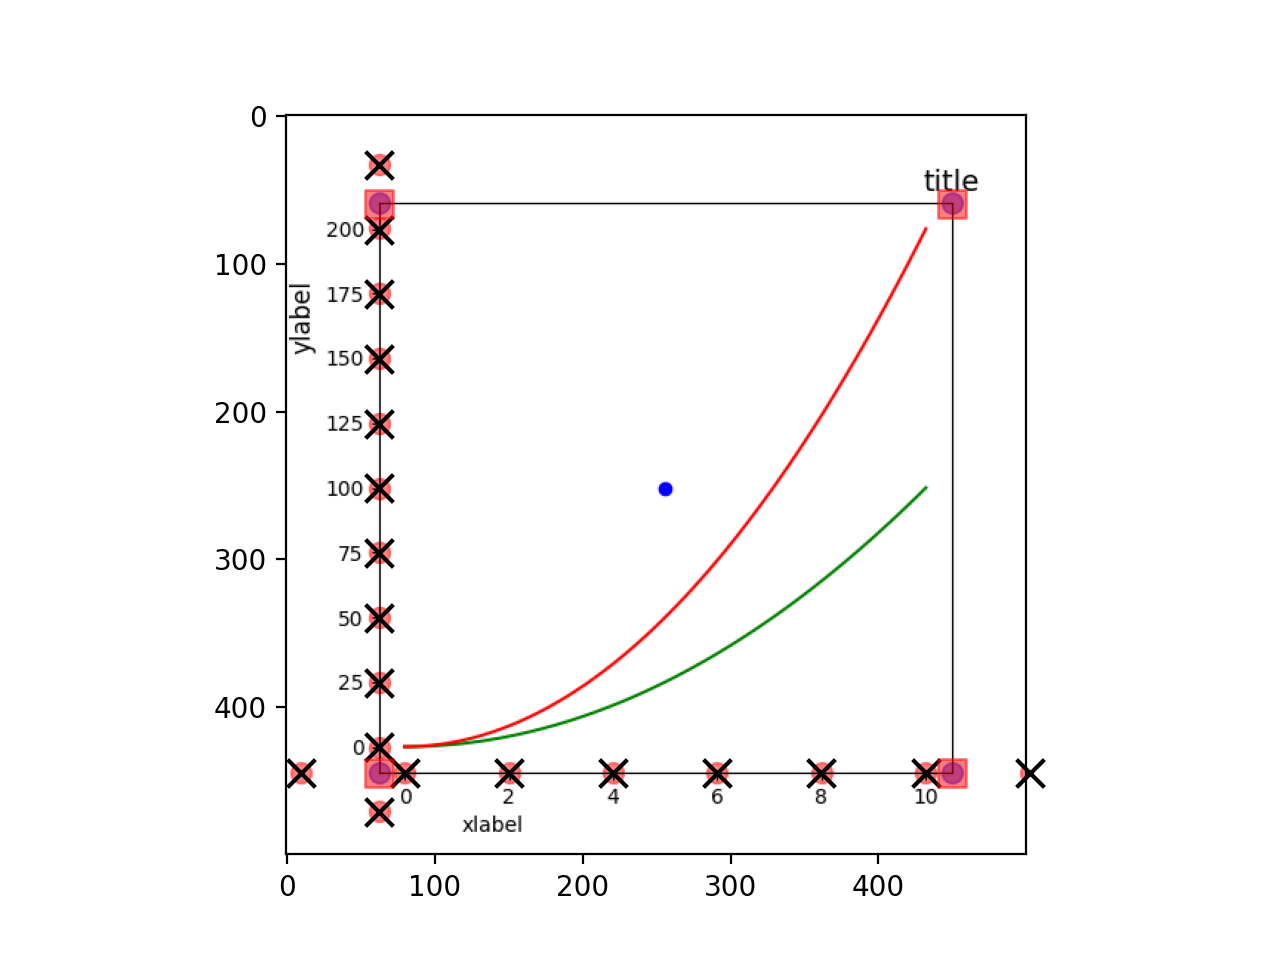

In [20]:
import matplotlib.image as img

image = img.imread('figures/test_figure_sc/test1.png')
    
fig, ax = plt.subplots()

ax.imshow(image)
x_t_pos = js_description['x_ticks_positions']
y_t_pos = js_description['y_ticks_positions']
bbox_pos = js_description['bbox_coordinates']

for p in x_t_pos:    
    ax.scatter(
        *p, color='k', s=100, alpha=1, marker='x',
        transform=ax.transAxes, clip_on=False)
    
for p in y_t_pos:    
    ax.scatter(
        *p, color='k', s=100, alpha=1, marker='x',
        transform=ax.transAxes, clip_on=False)
    
for p in bbox_pos:
    ax.scatter(
        *p, color='r', s=100, alpha=0.5, marker='s',
        transform=ax.transAxes, clip_on=False)
    
plt.show()


## We can get values directly from line object

In [39]:
ax.lines[0].get_data()[0][:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

# Scatter plots

<IPython.core.display.Javascript object>


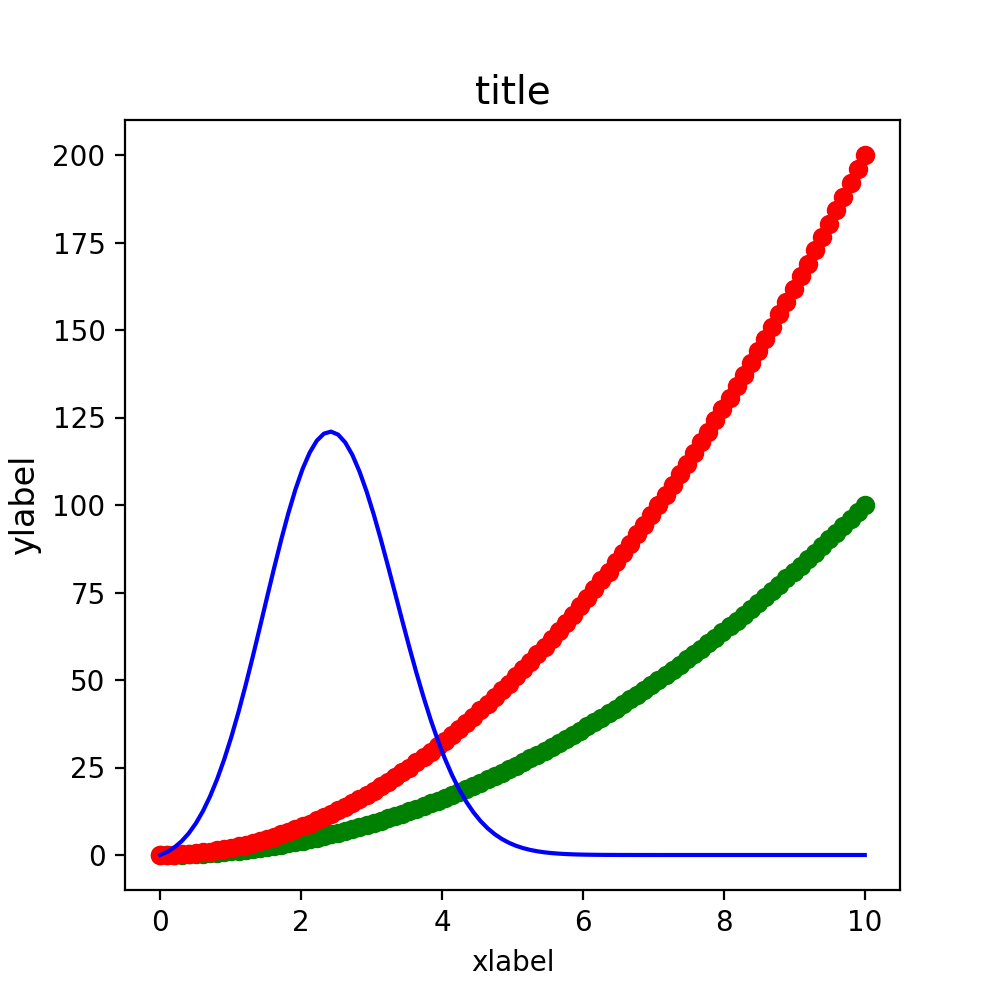

In [22]:
fig, ax = plt.subplots(figsize=(5,5))

x_lbl = ax.set_xlabel('xlabel', fontsize=10)
y_lbl = ax.set_ylabel('ylabel', fontsize=12)
ttl = ax.set_title('title', fontsize=14)

x = np.linspace(0, 10, 100)
sc1 = ax.scatter(x, x**2, c='g')
sc2 = ax.scatter(x, 2 * x**2, c='r')
ax.plot(x, x * np.exp(-(x - 2)**2 / 2 + 4), c='b')


## Get points from scatter plot

In [24]:
sc1.get_offsets().data[:10]


array([[0.        , 0.        ],
       [0.1010101 , 0.01020304],
       [0.2020202 , 0.04081216],
       [0.3030303 , 0.09182736],
       [0.4040404 , 0.16324865],
       [0.50505051, 0.25507601],
       [0.60606061, 0.36730946],
       [0.70707071, 0.49994898],
       [0.80808081, 0.65299459],
       [0.90909091, 0.82644628]])

In [26]:
js_description = {}

#
# Labels data
#
js_description['y_label_position'] = y_lbl.get_position()
js_description['x_label_position'] = x_lbl.get_position()
js_description['title_position'] = ttl.get_position()


#
# Axes and ticks data
#

x_ticks, y_ticks, x_ticks_pos, y_ticks_pos = get_ticks(fig, ax)

js_description['bbox_coordinates'] = get_bbox_coordinates(fig, ax)
js_description['x_lims'] = ax.get_xlim()
js_description['y_lims'] = ax.get_ylim()
js_description['x_ticks_num'] = len(x_ticks)
js_description['y_ticks_num'] = len(x_ticks)
# js_description['x_ticks'] = x_ticks
# js_description['y_ticks'] = y_ticks
js_description['x_ticks_positions'] = x_ticks_pos
js_description['y_ticks_positions'] = y_ticks_pos

js_description['x_label'] = x_lbl.get_position()[0]
js_description['y_label'] = y_lbl.get_position()[1]
js_description['title'] = y_lbl.get_position()


js_description


{'y_label_position': (41.31944444444444, 0.5),
 'x_label_position': (0.5, 51.44444444444443),
 'title_position': (0.5, 1.0),
 'bbox_coordinates': array([[0.125, 0.11 ],
        [0.125, 0.88 ],
        [0.9  , 0.11 ],
        [0.9  , 0.88 ]]),
 'x_lims': (-0.5, 10.5),
 'y_lims': (-10.0, 210.0),
 'x_ticks_num': 8,
 'y_ticks_num': 8,
 'x_ticks_positions': array([[0.01931818, 0.11      ],
        [0.16022727, 0.11      ],
        [0.30113636, 0.11      ],
        [0.44204545, 0.11      ],
        [0.58295455, 0.11      ],
        [0.72386364, 0.11      ],
        [0.86477273, 0.11      ],
        [1.00568182, 0.11      ]]),
 'y_ticks_positions': array([[0.125 , 0.0575],
        [0.125 , 0.145 ],
        [0.125 , 0.2325],
        [0.125 , 0.32  ],
        [0.125 , 0.4075],
        [0.125 , 0.495 ],
        [0.125 , 0.5825],
        [0.125 , 0.67  ],
        [0.125 , 0.7575],
        [0.125 , 0.845 ],
        [0.125 , 0.9325]]),
 'x_label': 0.5,
 'y_label': 0.5,
 'title': (41.31944444444444,